##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [4]:
pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 7.5 MB/s eta 0:00:0000:0100:01m
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Number of unique classes
print(f"Number of unique classes: {len(np.unique(y_train))}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of unique classes: 10


In [3]:
# Define class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

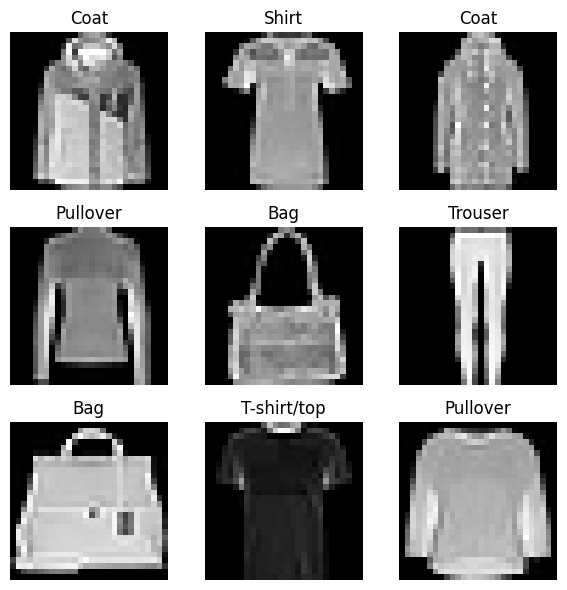

In [4]:
# Plot a 3x3 grid of random images from the dataset with their labels
import random

plt.figure(figsize=(6,6))

for i in range(9):
    idx = random.randint(0, len(x_train) - 1)

    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()


T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


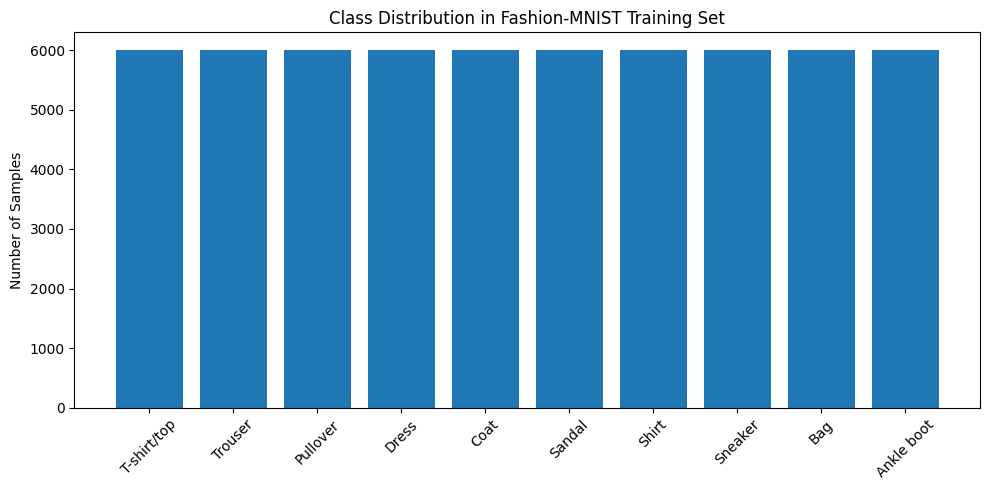

In [5]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train)

for i, count in enumerate(class_counts):
    print(f"{class_names[i]}: {count}")

# Plot the class distribution
plt.figure(figsize=(10,5))
plt.bar(class_names, class_counts)
plt.xticks(rotation=45)
plt.title("Class Distribution in Fashion-MNIST Training Set")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [6]:
# Import libraries
from tensorflow import keras
from tensorflow.keras import layers
# Normalize pixel values for x_train and x_test
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
# One-hot encode the labels

# Build a CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),          
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax") 
])
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8090 - loss: 0.5367 - val_accuracy: 0.8672 - val_loss: 0.3541
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8730 - loss: 0.3501 - val_accuracy: 0.8885 - val_loss: 0.2951
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8893 - loss: 0.3035 - val_accuracy: 0.8908 - val_loss: 0.2908
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9007 - loss: 0.2744 - val_accuracy: 0.8965 - val_loss: 0.2759
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9065 - loss: 0.2505 - val_accuracy: 0.9037 - val_loss: 0.2572
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9138 - loss: 0.2334 - val_accuracy: 0.9072 - val_loss: 0.2465
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9205 - loss: 0.2147 - val_accuracy: 0.9092 - val_loss: 0.2401
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9276 - loss: 0.1974 - val_accuracy: 0.